## Data description
- target = 0 or 1, 0 being negative, 1 being positive
- id - tweet id
- date - date of tweet
- flag - query or no query
- text - raw tweet text
- cleaned_text - cleaned tweet text

30k for training and 10k for testing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sentiment_df = pd.read_csv("./sentiment140_cleaned.csv")

In [3]:
sentiment_df.head()

,target,id,date,flag,user,text,cleaned_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl awww thats bumm...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save 50...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see


In [4]:
sentiment_df.shape

(1600000, 7)

In [5]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   target        1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   date          1600000 non-null  object
 3   flag          1600000 non-null  object
 4   user          1600000 non-null  object
 5   text          1600000 non-null  object
 6   cleaned_text  1599678 non-null  object
dtypes: int64(2), object(5)
memory usage: 85.4+ MB


In [6]:
sentiment_df.describe()

,target,id
count,1600000.0,1.600000e+06
mean,0.5,1.998818e+09
std,0.5,1.935761e+08
min,0.0,1.467810e+09
25%,0.0,1.956916e+09
50%,0.5,2.002102e+09
75%,1.0,2.177059e+09
max,1.0,2.329206e+09


In [7]:
sentiment_df[sentiment_df.cleaned_text.isna() == True]

,target,id,date,flag,user,text,cleaned_text
3997,0,1468720797,Tue Apr 07 03:21:48 PDT 2009,NO_QUERY,mohdnajwan,what to do,NaN
4233,0,1468771833,Tue Apr 07 03:39:06 PDT 2009,NO_QUERY,goldieloxx,just,NaN
18950,0,1556733475,Sun Apr 19 00:05:23 PDT 2009,NO_QUERY,LouiseRedknapp,up again,NaN
27140,0,1559064681,Sun Apr 19 10:09:43 PDT 2009,NO_QUERY,horriddeath,and it did,NaN
29900,0,1563617479,Sun Apr 19 23:32:19 PDT 2009,NO_QUERY,chrzrd,Its over!,NaN
...,...,...,...,...,...,...,...
1592715,1,2191790700,Tue Jun 16 05:58:39 PDT 2009,NO_QUERY,halleyji,so this it .. then,NaN
1595775,1,2192466848,Tue Jun 16 07:04:51 PDT 2009,NO_QUERY,ValeriaJsmPr,here I am,NaN
1596318,1,2192628378,Tue Jun 16 07:19:07 PDT 2009,NO_QUERY,aptextclan,is ON!!!!!!,NaN
1598921,1,2193305981,Tue Jun 16 08:16:39 PDT 2009,NO_QUERY,Jsstar0273,If only?,NaN


In [8]:
sentiment_df['cleaned_text'] = sentiment_df['cleaned_text'].fillna("").astype(str)

In [9]:
sentiment_df.target.value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

In [10]:
sentiment_df[sentiment_df.target == 0].head(1)

,target,id,date,flag,user,text,cleaned_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl awww thats bumm...


In [11]:
sentiment_df[sentiment_df.target == 1].head(1)

,target,id,date,flag,user,text,cleaned_text
800000,1,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,love health4uandpets u guys r best


In [12]:
# 1 -> Positive, 0 -> Negative

In [13]:
sentiment_df = sentiment_df.sample(n=40000)

In [14]:
y = sentiment_df['target'].values

#### BoW - Bag of words

Uses an unordered collection (a "bag") of words

sentence - a blue dog was a cool dog

Vocab size - 8


a an the blue cat dog was cool

Op  - [2 0 0 1 0 2 0 1]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)  # limit vocab for simplicity
X_bow = vectorizer.fit_transform(sentiment_df['cleaned_text']).toarray()

In [16]:
X_bow.shape

(40000, 1000)

In [18]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_bow, y, test_size=0.25, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
# raytune

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32,
    verbose=1
)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6954 - loss: 0.5780 - val_accuracy: 0.7275 - val_loss: 0.5382
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7552 - loss: 0.5036 - val_accuracy: 0.7302 - val_loss: 0.5371
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7782 - loss: 0.4658 - val_accuracy: 0.7327 - val_loss: 0.5389
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8030 - loss: 0.4222 - val_accuracy: 0.7323 - val_loss: 0.5647
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8291 - loss: 0.3717 - val_accuracy: 0.7278 - val_loss: 0.6251
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8572 - loss: 0.3192 - val_accuracy: 0.7195 - val_loss: 0.6656
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8784 - loss: 0.2758 - val_accuracy: 0.7212 - val_loss: 0.7491
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8885 - loss: 0.2462 - val_accuracy: 0.

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(test_acc)

0.7239000201225281


In [21]:
import joblib
model.save("ffnn_bow_model.keras")
joblib.dump(vectorizer, "bow_vectorizer.pkl")
# model = tf.keras.models.load_model("ffnn_bow_model.keras")
# vectorizer = joblib.load(vectorizer, "bow_vectorizer.pkl")

['bow_vectorizer.pkl']

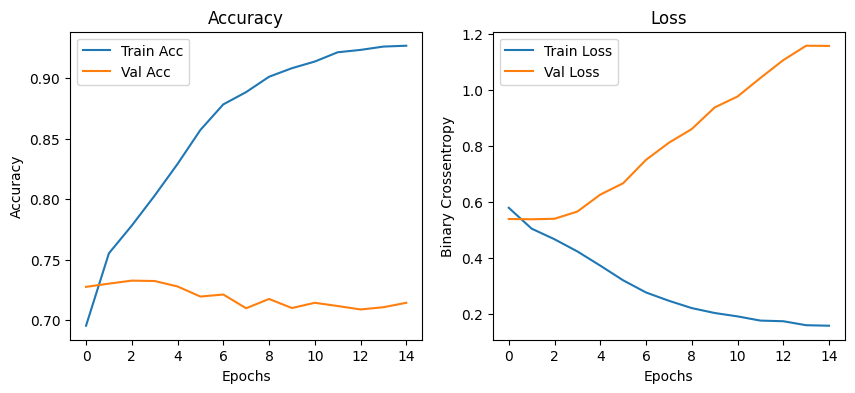

In [22]:
plt.figure(figsize=(10,4))

# Plot accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend()

plt.show()


### TF-IDF

Term Frequency – Inverse Document Frequency gives each word a weight based on:

how often it appears in a document (TF), and

how rare it is across all documents (IDF).

So, frequent but uninformative words (“the”, “is”, etc.) get down-weighted, while unique words get higher importance.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)

X = tfidf.fit_transform(sentiment_df['cleaned_text']).toarray()
y = sentiment_df['target'].values

print("TF-IDF shape:", X.shape)

TF-IDF shape: (40000, 1000)


In [24]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32,
    verbose=1
)


Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7020 - loss: 0.5677 - val_accuracy: 0.7280 - val_loss: 0.5282
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7555 - loss: 0.4969 - val_accuracy: 0.7353 - val_loss: 0.5276
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7774 - loss: 0.4618 - val_accuracy: 0.7298 - val_loss: 0.5365
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8134 - loss: 0.4068 - val_accuracy: 0.7313 - val_loss: 0.5562
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8511 - loss: 0.3296 - val_accuracy: 0.7255 - val_loss: 0.6175
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8862 - loss: 0.2565 - val_accuracy: 0.7250 - val_loss: 0.7162
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9081 - loss: 0.2053 - val_accuracy: 0.7192 - val_loss: 0.8057
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9202 - loss: 0.1738 - val_accuracy: 0.

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(test_acc)

0.7217000126838684


In [27]:
import joblib

# Save model
model.save("ffnn_tfidf_model.keras")

# Save vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

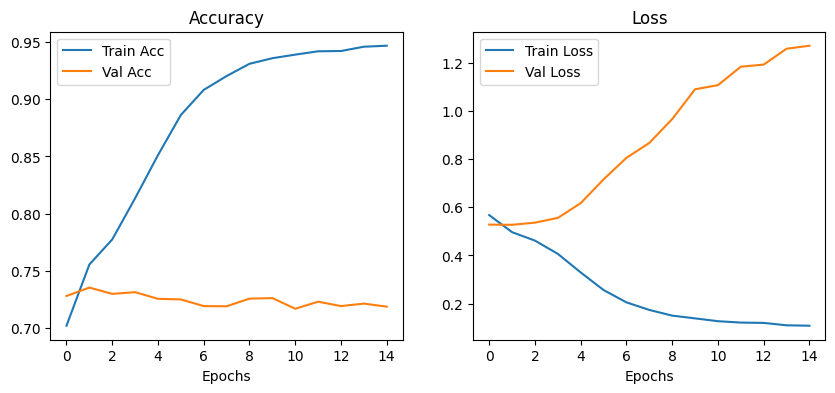

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()


### BERT


In [29]:
from transformers import pipeline

In [30]:
texts = sentiment_df['cleaned_text'].tolist()
y = sentiment_df['target'].values


embedder = pipeline(
    "feature-extraction",
    model="bert-base-uncased",
    framework="pt",  # Force PyTorch
    device=0        # or 0 if you have a GPU
)

embeddings = embedder(texts)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

C:\Users\nerfl\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\nerfl\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to 

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cuda:0


In [32]:
import numpy as np

# Mean pooling over tokens (axis=1) for each sentence
X = np.array([
    np.mean(np.squeeze(e), axis=0)  # e: (seq_len, hidden_dim)
    for e in embeddings
])
print("Sentence embeddings shape:", X.shape)

Sentence embeddings shape: (40000, 768)


In [66]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [67]:
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


In [68]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=64,
    verbose=1
)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6804 - loss: 0.5909 - val_accuracy: 0.7137 - val_loss: 0.5533
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7142 - loss: 0.5532 - val_accuracy: 0.7177 - val_loss: 0.5536
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7249 - loss: 0.5408 - val_accuracy: 0.7207 - val_loss: 0.5491
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7288 - loss: 0.5296 - val_accuracy: 0.7242 - val_loss: 0.5441
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7388 - loss: 0.5229 - val_accuracy: 0.7170 - val_loss: 0.5452


In [69]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.7327


In [70]:
from transformers import pipeline, BertModel, BertTokenizer
# from tensorflow.keras.models import load_model

model.save("ffnn_bert_model.keras")

embedder.model.save_pretrained("bert_model")
embedder.tokenizer.save_pretrained("bert_model")

# loaded_model = load_model("ffnn_bert_model.keras")
# tokenizer = BertTokenizer.from_pretrained("bert_model")
# bert_model = BertModel.from_pretrained("bert_model")
# loaded_embedder = pipeline("feature-extraction", model=bert_model, tokenizer=tokenizer)

('bert_model\\tokenizer_config.json',
 'bert_model\\special_tokens_map.json',
 'bert_model\\vocab.txt',
 'bert_model\\added_tokens.json',
 'bert_model\\tokenizer.json')

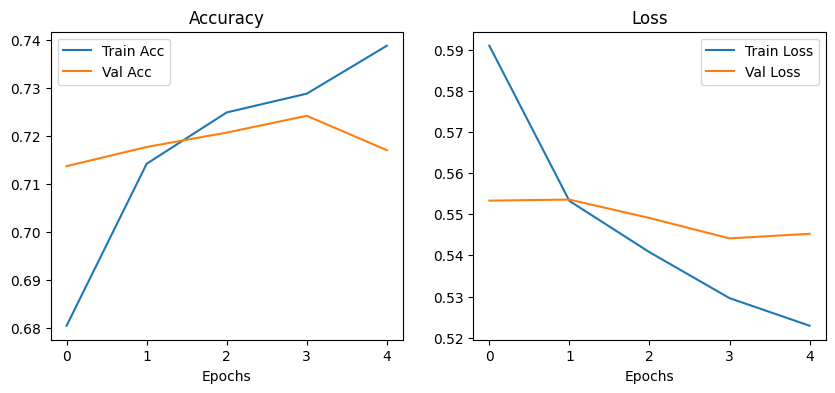

In [71]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()


#### Sentence Tokenizer

In [86]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer('all-MiniLM-L6-v2')  # Fast, compact, high quality
texts = sentiment_df['cleaned_text'].tolist()

sentence_embeddings = embedder.encode(texts, device = 0)


In [88]:
y = sentiment_df['target'].values
X = sentence_embeddings

In [89]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [90]:
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


In [91]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=64,
    verbose=1
)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7161 - loss: 0.5538 - val_accuracy: 0.7490 - val_loss: 0.5132
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7465 - loss: 0.5127 - val_accuracy: 0.7490 - val_loss: 0.5086
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7600 - loss: 0.4948 - val_accuracy: 0.7452 - val_loss: 0.5075
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7775 - loss: 0.4732 - val_accuracy: 0.7518 - val_loss: 0.5063
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7922 - loss: 0.4484 - val_accuracy: 0.7487 - val_loss: 0.5111


In [82]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.7457


In [83]:
# from tensorflow.keras.models import load_model

model.save("ffnn_sentence_model.keras")

# model = SentenceTransformer('ffnn_sentence_model.keras')

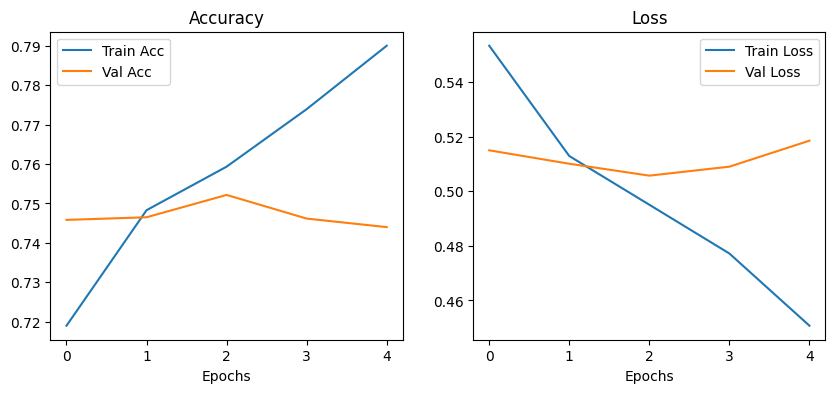

In [84]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()


In [102]:
import torch
import numpy as np

text = "I really hate what's happening currently, Kim Jong Un is testing Nuclear Weapons again!"

embedding = embedder.encode([text], convert_to_tensor=True, device='cuda')
embedding_np = embedding.detach().cpu().numpy()

output = model.predict(embedding_np)

predicted_class = (output > 0.5).astype(int)[0][0]
print("Output value", output)
print("Prediction class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Output value [[0.06537058]]
Prediction class: 0


In [103]:
text = "Mechanical keyboard are really great, they are way superior than membrane keyboards"

embedding = embedder.encode([text], convert_to_tensor=True, device='cuda')
embedding_np = embedding.detach().cpu().numpy()

output = model.predict(embedding_np)

predicted_class = (output > 0.5).astype(int)[0][0]
print("Output value", output)
print("Prediction class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Output value [[0.9101476]]
Prediction class: 1
